## Importing Dependencies

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
##unlike colab jupyter doesn't show plots right below cells but it opens another window to show them.
##above line of code allows the plots to be shown right below the cells

## Loading the boston house pricing dataset

In [3]:
from sklearn import datasets
house_data = datasets.fetch_california_housing()

In [4]:
type(house_data)

sklearn.utils._bunch.Bunch

In [5]:
house_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
#checking the description of dataset
print(house_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
print(house_data.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


In [8]:
print(house_data.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [9]:
print(house_data.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Preparing the dataset

In [10]:
house_df = pd.DataFrame(house_data.data,columns=house_data.feature_names)

In [11]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
#adding target column to dataframe
house_df['Price'] = house_data.target

In [13]:
house_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
#getting information abt df
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [15]:
## statistical measures of dataset
house_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [16]:
#checking for missing values
house_df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

## Exploratory Data Analysis

In [17]:
#checking correlation between features
house_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [18]:
import seaborn as sns

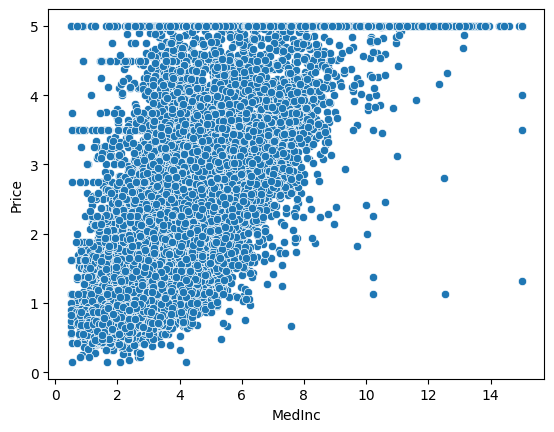

In [19]:
sns.scatterplot(data=house_df,x=house_df['MedInc'],y=house_df['Price'])
plt.show()

In [21]:
##separating dependent and independent features
X = house_df.drop(['Price'],axis=1)
Y = house_df['Price']

In [22]:
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [86]:
##creating train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y,test_size=0.2,random_state=42)

In [87]:
X_train

array([[   3.2596    ,   33.        ,    5.0176565 , ...,    3.6918138 ,
          32.71      , -117.03      ],
       [   3.8125    ,   49.        ,    4.47354497, ...,    1.73809524,
          33.77      , -118.16      ],
       [   4.1563    ,    4.        ,    5.64583333, ...,    2.72321429,
          34.66      , -120.48      ],
       ...,
       [   2.9344    ,   36.        ,    3.98671727, ...,    3.33206831,
          34.03      , -118.38      ],
       [   5.7192    ,   15.        ,    6.39534884, ...,    3.17889088,
          37.58      , -121.96      ],
       [   2.5755    ,   52.        ,    3.40257649, ...,    2.10869565,
          37.77      , -122.42      ]], shape=(16512, 8))

In [88]:
#Standardizing the data for better model training
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
scaler.fit(X_train)

StandardScaler()

In [91]:
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [92]:
X_train_std

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]], shape=(16512, 8))

In [93]:
X_test_std

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]], shape=(4128, 8))

## Model Training

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()

In [96]:
model.fit(X_train_std,Y_train)

LinearRegression()

In [97]:
#checking coefficeints
print(model.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [98]:
#checking intercept
print(model.intercept_)

2.071946937378619


In [99]:
#prediction on test data
test_pred = model.predict(X_test_std)

In [100]:
test_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

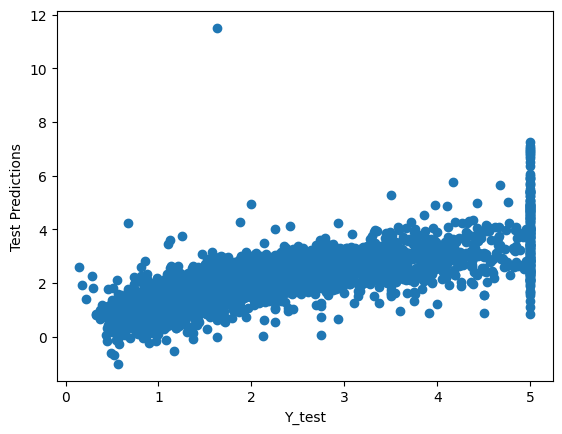

In [101]:
##scatter plot for prediction 
plt.scatter(Y_test,test_pred)
plt.ylabel('Test Predictions')
plt.xlabel('Y_test')
plt.show()

In [102]:
#calculating residuals(error)
residuals= Y_test-test_pred

In [103]:
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: Price, Length: 4128, dtype: float64

<Figure size 300x300 with 0 Axes>

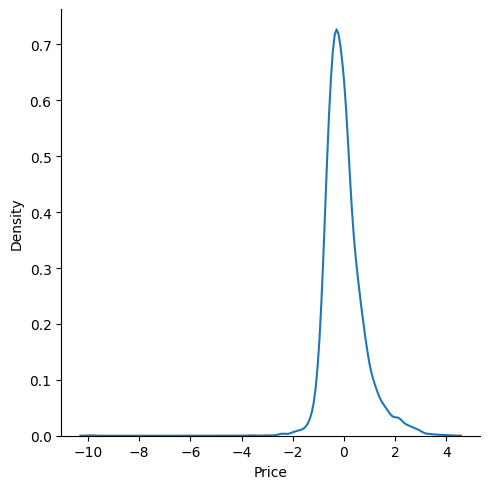

In [104]:
#plotting residuals
plt.figure(figsize=(3,3))
sns.displot(residuals,kind="kde")
plt.show()

## Evaluating Performance

In [105]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [106]:
mse = mean_squared_error(Y_test,test_pred)
print(mse)

0.5558915986952442


In [107]:
mae = mean_absolute_error(Y_test,test_pred)
print(mae)

0.5332001304956565


In [108]:
rmse = np.sqrt(mse)

In [109]:
print(rmse)

0.7455813830127763


In [110]:
#calculating R square
from sklearn.metrics import r2_score

In [112]:
rsquare = r2_score(Y_test,test_pred)
print(rsquare)

0.575787706032451


## New data prediction

In [113]:
input = [8.3252,41,6.98412698,1.02380952,322,2.55555556,37.88,-122.23]

In [114]:
#convert input into numpy array
input_as_np_array = np.asarray(input)
type(input_as_np_array)

numpy.ndarray

In [115]:
#reshaping the input as we are predicting for single data point
input_reshaped = input_as_np_array.reshape(1,-1)

In [116]:
input_reshaped.shape

(1, 8)

In [117]:
#standardizing the input
input_std = scaler.transform(input_reshaped)

In [118]:
prediction = model.predict(input_std) 

In [119]:
print(prediction)

[4.15194268]


## Pickling the model file for deployment

In [120]:
import pickle

In [121]:
pickle.dump(model,open('regmodel.pkl','wb')) #if file named 'regmodel' doesn't exist then it will create it open im write byte format and save our model in it

## Loading the saved model

In [123]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [124]:
pickled_model.predict(input_std)

array([4.15194268])